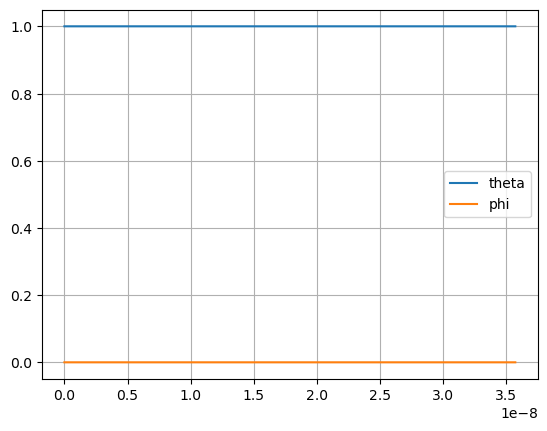

In [2]:
# Affichage des probabilités de |0> et |1> :

import numpy as np
import matplotlib.pyplot as plt

time = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=0)
theta = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=1)
phi = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=3)# Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=4)# Colonne probab de |1> , abs(beta)



plt.plot(time , P1, label='theta')
plt.plot(time , P2 , label='phi')
plt.legend()
#plt.ylim([0,1])
plt.grid()
plt.show()

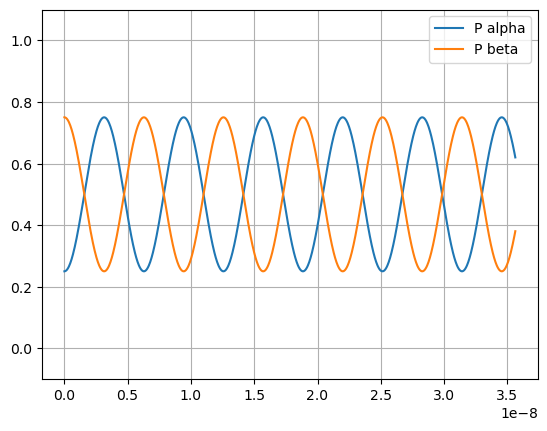

In [5]:
# Affichage des probabilités de |0> et |1> : rk4 couplé

data = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1 , usecols=(0,3,4))

time = data[:,0]
P1 = data[:,1]
P2 = data[:,2]


plt.plot(time , P1, label='P alpha')
plt.plot(time , P2 , label='P beta')
plt.legend()
plt.ylim([-0.1,1.1])
plt.grid()
plt.show()

99


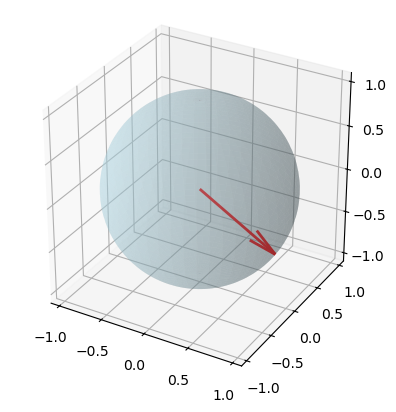

MovieWriter ffmpeg unavailable; using Pillow instead.


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Charger les données de simulation (assure-toi que ces arrays sont disponibles)
time = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=0)
theta = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=1)
phi = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=3)# Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=4)# Colonne probab de |1> , abs(beta)

n_frames = len(time)//1007  # Nombre de pas de temps
print(n_frames)

# Conversion sphériques -> cartésiennes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Préparation de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_box_aspect([1, 1, 1])

# Ajout d'une sphère pour guider l'animation
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Initialisation de la flèche (vecteur)
arrow = ax.quiver(0, 0, 0, x[0], y[0], z[0], color='red', linewidth=2)

# Fonction de mise à jour de l'animation
def update(frame):
    arrow.set_segments([[[0, 0, 0], [x[frame], y[frame], z[frame]]]])
    return arrow,

# Création de l'animation
anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)

# Affichage
plt.show()

# Sauvegarde de l'animation
anim.save("precession_arrow.gif", writer="ffmpeg", fps=60)